In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors              
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [416]:
df = pd.read_csv('C:\\Users\\Praneeth PC\\Desktop\\PR_Projecct_2\\ObesityDataSet_raw_and_data_sinthetic.csv',
                header=0
                )


In [417]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [418]:
df.rename({'NObeyesdad' : 'Level'} , axis='columns', inplace='True')
df.rename({'FAVC' : 'F_highcal'} , axis='columns', inplace='True')
df.rename({'FCVC' : 'F_veg'} , axis='columns', inplace='True')
df.rename({'NCP	' : 'Main_meals'} , axis='columns', inplace='True')
df.rename({'CAEC' : 'Food_between_meals'} , axis='columns', inplace='True')
df.rename({'SCC' : 'Cal_check'} , axis='columns', inplace='True')
df.rename({'FAF' : 'Physical_activity'} , axis='columns', inplace='True')
df.rename({'TUE' : 'Time_devices'} , axis='columns', inplace='True')
df.rename({'CALC' : 'Alcohol'} , axis='columns', inplace='True')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,F_highcal,F_veg,NCP,Food_between_meals,SMOKE,CH2O,Cal_check,Physical_activity,Time_devices,Alcohol,MTRANS,Level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [419]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
F_highcal                          object
F_veg                             float64
NCP                               float64
Food_between_meals                 object
SMOKE                              object
CH2O                              float64
Cal_check                          object
Physical_activity                 float64
Time_devices                      float64
Alcohol                            object
MTRANS                             object
Level                              object
dtype: object

In [420]:
df['Level'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [421]:
df['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [422]:
df['F_highcal'].unique()  

array(['no', 'yes'], dtype=object)

In [423]:
#df['F_veg'].unique() 

In [424]:
#df['Main_meals'].unique()  

In [425]:
df['Food_between_meals'].unique() 

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [426]:
df['SMOKE'].unique() 

array(['no', 'yes'], dtype=object)

In [427]:
#df['CH2O'].unique() 

In [428]:
df['Cal_check'].unique()    

array(['no', 'yes'], dtype=object)

In [429]:
#df['Physical_activity'].unique()

In [430]:
#df['Time_devices'].unique() 

In [431]:
df['Alcohol'].unique() 

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [432]:
df['MTRANS'].unique()  

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [433]:
X=df.drop('Level', axis=1).copy()
X.head()


,Gender,Age,Height,Weight,family_history_with_overweight,F_highcal,F_veg,NCP,Food_between_meals,SMOKE,CH2O,Cal_check,Physical_activity,Time_devices,Alcohol,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [434]:
y=df['Level'].copy()
y.head()


0          Normal_Weight
1          Normal_Weight
2          Normal_Weight
3     Overweight_Level_I
4    Overweight_Level_II
Name: Level, dtype: object

In [473]:
X_encoded=pd.get_dummies(X, columns=['Gender','family_history_with_overweight','F_highcal','F_veg','Food_between_meals','SMOKE','Cal_check','Alcohol','MTRANS'])
X_encoded.head()

,Age,Height,Weight,NCP,CH2O,Physical_activity,Time_devices,Gender_Female,Gender_Male,family_history_with_overweight_no,...,Cal_check_yes,Alcohol_Always,Alcohol_Frequently,Alcohol_Sometimes,Alcohol_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,3.0,2.0,0.0,1.0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,0.0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,3.0,2.0,2.0,1.0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,2.0,2.0,0.0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,1.0,2.0,0.0,0.0,0,1,1,...,0,0,0,1,0,0,0,0,1,0


In [504]:
X_train, X_test, y_train , y_test =train_test_split(X_encoded, y )
X_train_scaled = scale(X_train)
X_test_scaled= scale(X_test)


In [505]:
clf_svm = SVC()
clf_svm.fit(X_train_scaled, y_train)

SVC()

accuracy: 0.5454545454545454


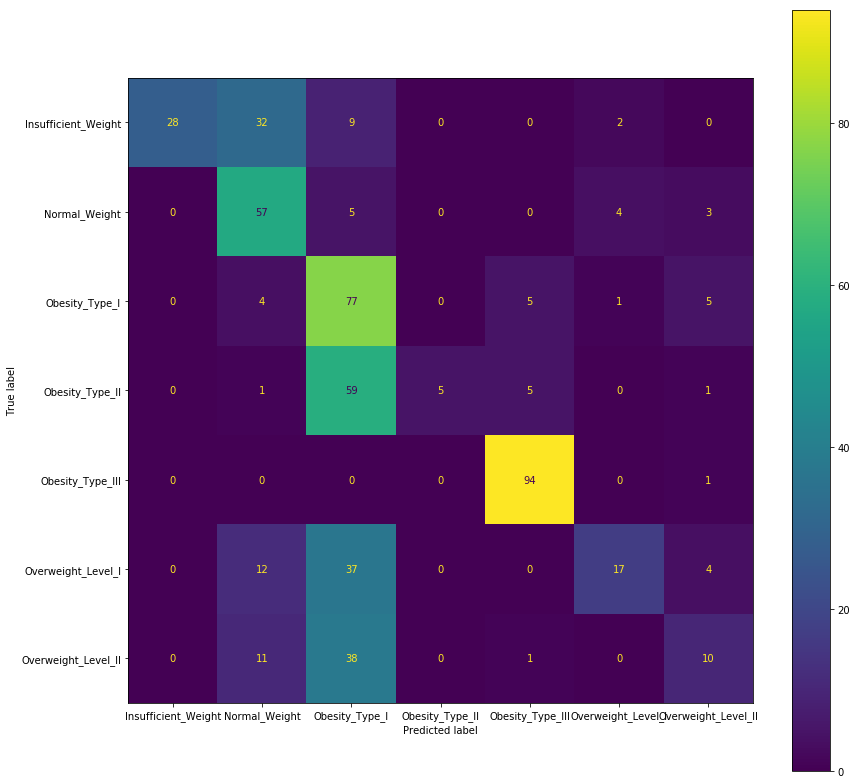

In [506]:
fig, ax = plt.subplots(figsize=(14, 14))
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, ax=ax)
y_pred = clf_svm.predict(X_test_scaled)
a=accuracy_score(y_test, y_pred,normalize=True)
print('accuracy:',a)

In [442]:
param_grid=[
    {'C' : [0.5,1,10,100,1000],
     'gamma':['scale', 1, 0.1, 0.01, 0.001],
     'kernel':['rbf'] },
]

In [383]:
optimal_params= GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',

)


In [386]:
optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

KeyboardInterrupt: 

In [507]:
clf_svm= SVC( C=1000, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1000, gamma=0.001)

accuracy: 0.9223484848484849


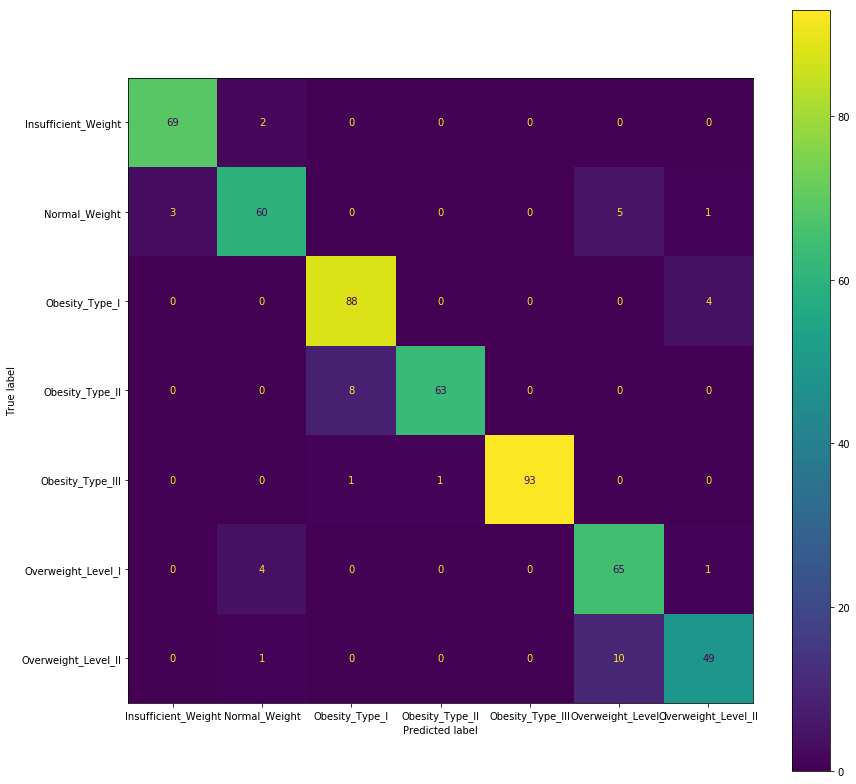

In [508]:
fig, ax = plt.subplots(figsize=(14, 14))
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, ax=ax)
y_pred = clf_svm.predict(X_test_scaled)
a=accuracy_score(y_test, y_pred,normalize=True)
print('accuracy:',a)

0.7083333333333334

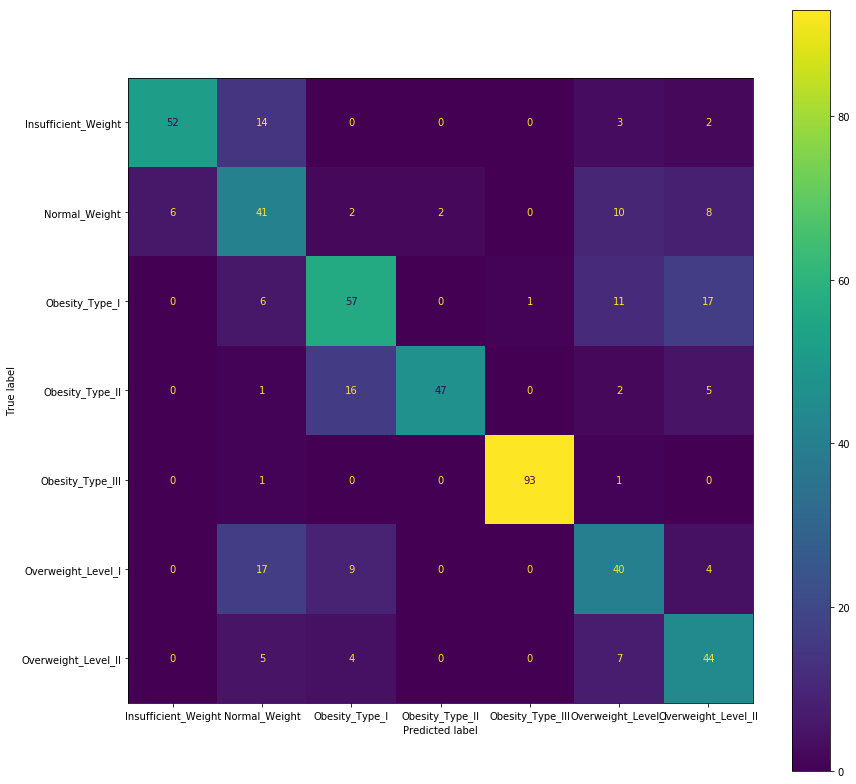

In [509]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn = KNeighborsClassifier(n_neighbors=1)


knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)
fig, ax = plt.subplots(figsize=(14, 14))

plot_confusion_matrix(knn, X_test_scaled, y_test, ax=ax)
accuracy_score(y_test, y_pred,normalize=True)



In [603]:
pca = PCA()

X_encoded_pca_numeric=pca.fit_transform(X_encoded)
n=0
for i in range(0,7):
   print( pca.explained_variance_ratio_[i]*100)
   if pca.explained_variance_ratio_[i]*100 >5 :
       n=n+1
print(n)


94.05484006674172
5.292534488043713
0.11609006283334464
0.08343259586373988
0.06982712650484095
0.05602071438382244
0.04738509060955767
2


In [604]:
pca = PCA(n_components=2)
X_encoded_pca_numeric=pca.fit_transform(X_encoded)


In [605]:
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2
X_categorical=X_encoded.drop(['Age', 'Height','Weight', 'NCP','CH2O','Time_devices','Physical_activity'] , axis=1).copy()
X_categorical.head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,F_highcal_no,F_highcal_yes,F_veg_1.0,F_veg_1.003566,F_veg_1.005578,F_veg_1.00876,...,Cal_check_yes,Alcohol_Always,Alcohol_Frequently,Alcohol_Sometimes,Alcohol_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,0,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [606]:
X_categorical_chi_squared= SelectKBest(chi2,k=600).fit_transform(X_categorical,y)

In [607]:
X_new_cat=pd.DataFrame(X_categorical_chi_squared)

In [608]:
X_encoded_pca_numeric_scaled= scale(X_encoded_pca_numeric)


In [609]:
X_encoded_pca_numeric_df=pd.DataFrame(X_encoded_pca_numeric_scaled)
X_extracted = pd.concat([X_new_cat, X_encoded_pca_numeric_df], axis=1, sort=False)

In [610]:
X_train_fs, X_test_fs, y_train , y_test =train_test_split(X_extracted, y )


accuracy: 0.8541666666666666


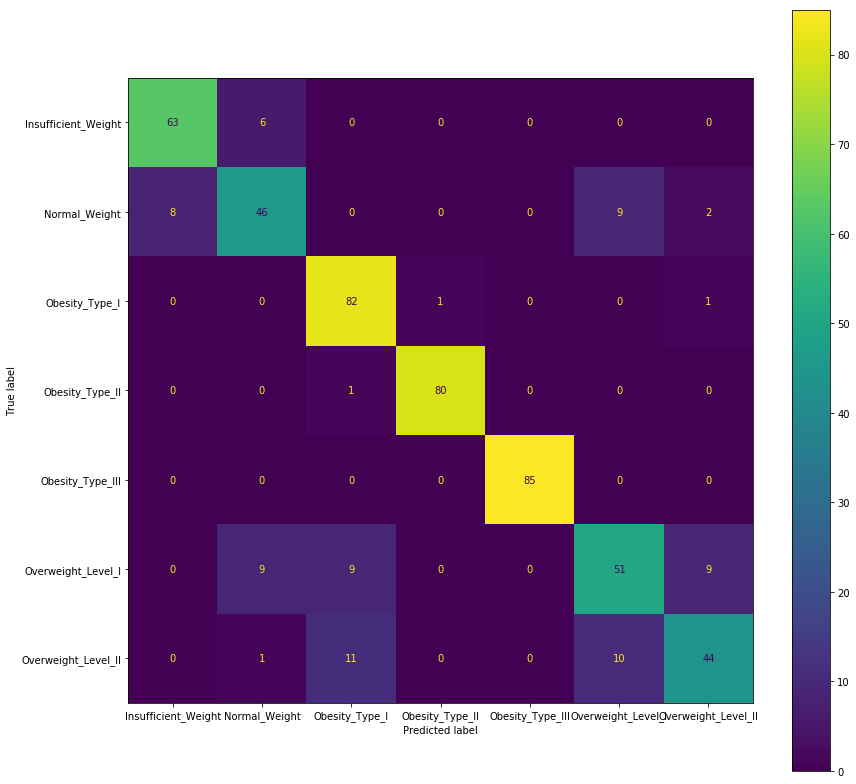

In [613]:
clf_svm= SVC( C=1000, gamma=0.001)
clf_svm.fit(X_train_fs, y_train)




fig, ax = plt.subplots(figsize=(14, 14))
plot_confusion_matrix(clf_svm, X_test_fs, y_test, ax=ax)
y_pred = clf_svm.predict(X_test_fs)
c=accuracy_score(y_test, y_pred,normalize=True)
print('accuracy:',c)

0.8295454545454546

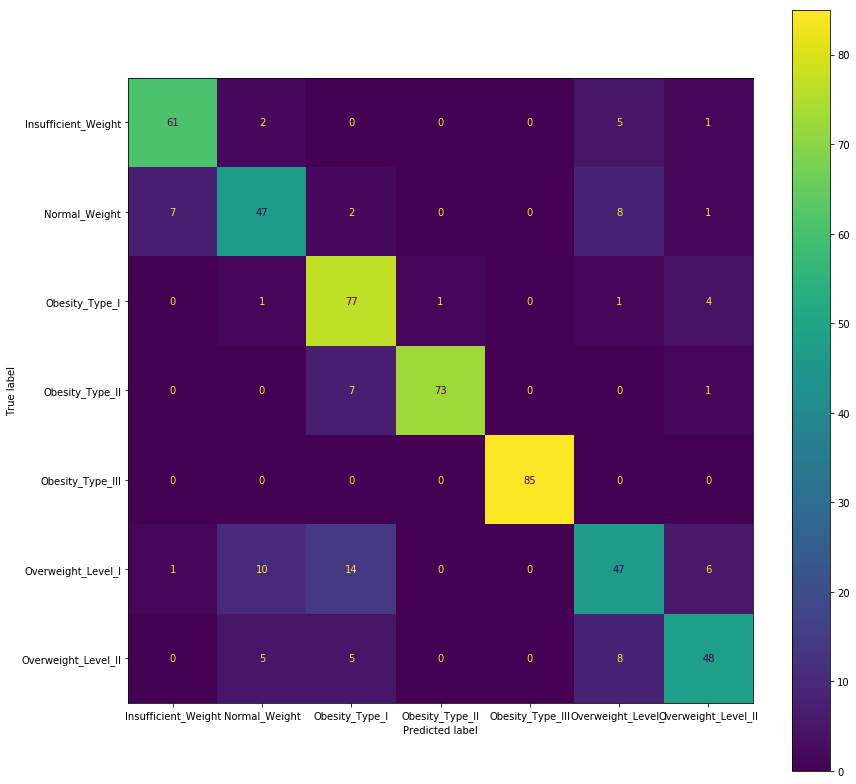

In [614]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn = KNeighborsClassifier(n_neighbors=1)


knn.fit(X_train_fs, y_train)


y_pred = knn.predict(X_test_fs)
fig, ax = plt.subplots(figsize=(14, 14))

plot_confusion_matrix(knn, X_test_fs, y_test, ax=ax)
accuracy_score(y_test, y_pred,normalize=True)
